## FEATURE ENGINEERING

### Дипломная работа

### Задание
 
Представлены данные такси, по которым нужно предсказать, возьмёт ли таксист заказ или нет(driver_response).

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### I. ПОДГОТОВКА ДАННЫХ ДЛЯ АНАЛИЗА

#### 1. Загрузка данных для анализа. 

In [2]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [3]:
a = data.groupby(['driver_gk', 'driver_response'])['offer_gk'].count()
a

driver_gk  driver_response
14         0                    8
           1                  204
22         0                   12
           1                   82
42         0                   38
                             ... 
6800       1                  161
6802       0                  100
           1                   40
6806       0                   58
           1                  204
Name: offer_gk, Length: 873, dtype: int64

In [4]:
a = data.groupby('driver_gk').count().reset_index()
a

,driver_gk,offer_gk,weekday_key,hour_key,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,14,212,212,212,212,212,212,212,212,212,212,212,212,212
1,22,94,94,94,94,94,94,94,94,94,94,94,94,94
2,42,202,202,202,202,202,202,202,202,202,202,202,202,202
3,51,261,261,261,261,261,261,261,261,261,261,261,261,261
4,75,222,222,222,222,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,6762,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452
435,6792,746,746,746,746,746,746,746,746,746,746,746,746,746
436,6800,317,317,317,317,317,317,317,317,317,317,317,317,317
437,6802,140,140,140,140,140,140,140,140,140,140,140,140,140


#### 2. Отображение общей информации по датасету.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [6]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


Поскольку пояснений к названию признаков нет, то попытаемся их самостоятельно интерпретировать исходя из соображения здравого смысла. Для этих целей извлечем из датасета некоторые показатели - см. ниже.

In [7]:
# Количество уникальных значений 'offer_gk'
len(list(data.offer_gk.unique()))

100000

Количество уникальных значений 'offer_gk' совпадает с общим количеством значений. Значит этот показатель скорее всего какой-то уникальный идентификатор предложения.

In [8]:
# Уникальные значения 'weekday_key'
data.weekday_key.unique()

array([5, 6, 2, 4, 3, 1, 0], dtype=int64)

Получается, что 'weekday_key' - номера дней недели от 0 до 6. 

In [9]:
# Уникальные значения 'hour_key'
print(data.hour_key.unique())
# Количество уникальных значений 'hour_key'
len(list(data.hour_key.unique()))

[20 14  6 16 15 11  7 10 12  8  9 21 17 23 13 18  5 19 22  0  2  3  1  4]


24

'hour_key' - порядковый номер часа внутри одного дня - от 0 до 23.

In [10]:
# Количество уникальных значений 'driver_gk'
len(list(data.driver_gk.unique()))

439

'driver_gk' - уникальный идентификатор водителя. При этом на одного водителя в среднем приходится более 20 предложений.

In [11]:
# Количество уникальных значений 'order_gk' по группам
data.order_gk.value_counts()

853342    14
714527    13
761031    13
828548    12
180487    12
          ..
529767     1
361705     1
57063      1
782999     1
786432     1
Name: order_gk, Length: 81435, dtype: int64

Количество уникальных значений 'order_gk' - это уникальный идентификатор заказа. При этом данный показатель меньше, чем количество предложений 'offer_gk'. Значит один заказ может содержать в себе несколько предложений.

'driver_latitude', 'driver_longitude', 'origin_order_latitude' и 'origin_order_longitude' - координаты широты и долготы местонахождения водителя и заказчика в момент заказа. Некоторые значения данных признаков равны "-1", что некорректно, поскольку даные показатели не могут быть отрицательными.

In [12]:
# Количество уникальных значений 'distance_km' по группам
data.distance_km.value_counts()

-1.000     26207
 0.000       152
 7.718        39
 56.447       35
 11.014       32
           ...  
 1.530         1
 39.895        1
 25.843        1
 18.259        1
 0.674         1
Name: distance_km, Length: 31297, dtype: int64

In [13]:
# Количество уникальных значений 'duration_min' по группам
data.duration_min.value_counts()

-1.000     26207
 0.000       152
 21.467       65
 56.833       64
 23.333       56
           ...  
 98.500        1
 59.750        1
 77.817        1
 93.850        1
 82.750        1
Name: duration_min, Length: 4728, dtype: int64

Признаки 'distance_km' и 'duration_min' - это протяженность и длительность поездки. Данные признаки имеют по 26% значений, равных "-1". Поскольку протяженность и длительность не могут быть отрицательными, то по данным значениям примем допущение, что пункт назначения не был установлен на момент заказа такси.

In [14]:
# Уникальные значения 'offer_class_group'
print(data.offer_class_group.unique())
print('Количество "offer_class_group": ', len(data.offer_class_group.unique()))

['Economy' 'Standard' 'XL' 'Kids' 'Delivery' 'Test' 'Premium' 'VIP' 'VIP+']
Количество "offer_class_group":  9


'offer_class_group' - класс заказываемого такси (всего 9 классов).

In [15]:
# Уникальные значения 'ride_type_desc'
print(data.ride_type_desc.unique())
print('Количество "ride_type_desc": ', len(data.ride_type_desc.unique()))

['private' 'business' 'affiliate' 'SMB']
Количество "ride_type_desc":  4


'ride_type_desc' - классификатор частного или делового заказа (всего 4 типа).

In [16]:
# Количество уникальных значений 'driver_response' по группам
data.driver_response.value_counts()

0    50752
1    49248
Name: driver_response, dtype: int64

Решение водителей по заказам разделились примерно одинакого с преобладанием отказов.

#### Обобщение первых выводов: 
1. Общее количество признаков - 14;
2. Количество значений каждого признака - 100000; 
3. Пропусков значений нет ни по одному признаку;
4. Интерпретация названий признаков:
 - offer_gk - уникальный идентификатор предложения такси;
 - weekday_key - номер дня недели заказа такси (0 = воскресенье, 1 = понедельник, 2 = вторник и т.д.);
 - hour_key - час дня заказа такси (от 0:00 до 23:59);
 - driver_gk - уникальный идентификатор водителя;
 - order_gk - уникальный идентификатор заказа; один заказ может содержать в себе несколько предложений;
 - driver_latitude - географическая широта водителя на момент получения предложения;
 - driver_longitude - географическая долгота водителя на момент получения предложения; 
 - origin_order_latitude - географическая широта места начала заказа на момент получения предложения;
 - origin_order_longitude - географическая долгота места начала заказа на момент получения предложения;
 - distance_km - расчетное расстояние от пункта отправления до пункта назначения в километрах. Значение "-1" означает, что       пункт назначения не установлен;
 - duration_min - расчетная продолжительность поездки от пункта отправления до пункта назначения в минутах. Значение "-1" означает, что пункт назначения не установлен;
 - offer_class_group -  класс заказа (например, 'Economy', 'Standard', 'XL', 'Kids' и т.д., всего 9 классов);
 - ride_type_desc - классификатор частного или делового заказа ('private', 'business', 'affiliate', 'SMB'); 
 - driver_response - решение водителя по заказу (0 - не берет, 1 - берет).

#### 3. Выявление пропусков, а также возможных причин их возникновения. 

Пустых значений в датасете нет.

#### 4. Оценка зависимости переменных между собой. Использование корреляции и profile_report. 


МАТРИЦА КОРРЕЛЯЦИЙ


(12.0, 0.0)

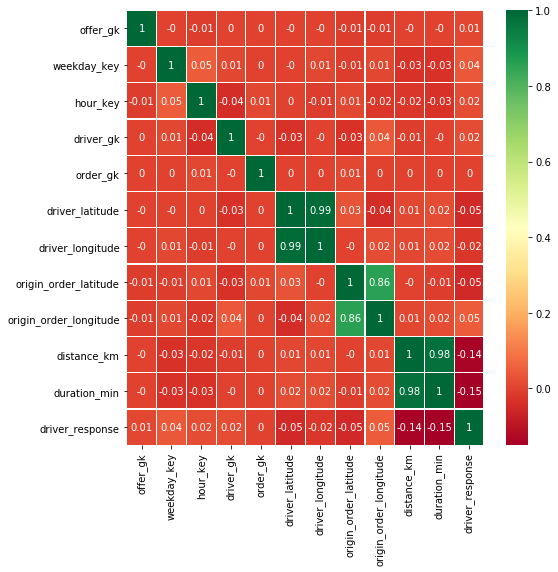

In [17]:
#Построение матрицы корреляции
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
f, ax = plt.subplots(figsize=(8, 8))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Наблюдаем высокую корреляцию 0,99 и 0,86 между 'driver_latitude' / 'driver_longitude' и 'origin_order_latitude' / 'origin_order_longitude' соответственно.

Отдельно удалить по одному признаку из корреляционных пар будет неверно, поскольку потеряем часть информации, но и оставить все эти признаки нельзя, т.к. это может привести к переобучению модели, а следовательно к неверному результату. Поэтому для исключения мультиколлинеарности создадим новый признак из указанных выше параметров с последующим удалением этих параметров: distance_to_order - расстояние от водителя до пункта отправления в момент появления заказа. 

Также есть высокая корреляция между 'distance_km' и 'duration_min'. Для исключения мультиколлинеарности можно либо оставить только один признак из пары, или по приведенной выше аналогии с координатами создать новый признак  - speed_average - среднюю скорость поездки от пункта отправления до пункта назначения, а два базовых - удалить. Но поскольку 'distance_km' и 'duration_min' - это расчетные, а не фактические показатели, то в каждом из них может быть ошибка, а преобразуя эти показатели в новый - ошибка может увеличиться. 

Исходя из предположения, что рассчетное расстояние между пунктом отправления и пунктом прибытия - это более точный показатель, чем расчетная продолжительность поездки, оставим только 'distance_km' для целей нашей работы. Признак 'duration_min' удалим.  

##### distance_to_order
Для определения 'distance_to_order' рассчитаем расстояние между двумя точками с помощью Geopy. В своих расчетах Geopy использует геодезическое расстояние или расстояние по большому кругу (см. документацию https://pypi.org/project/geopy/).

Для формирования первой точки (местоположение водителя) используем 'driver_latitude' и 'driver_longitude', второй (пункт отправления) - 'origin_order_latitude' и 'origin_order_longitude'.

Предварительно проанализируем значения данных признаков.


In [18]:
# Анализ значений 'driver_latitude', 'driver_longitude', 'origin_order_latitude' и 'origin_order_longitude'

a = data['driver_latitude'].replace([0, -1], 100) 
b = data['driver_longitude'].replace([0, -1], 100) 
c = data['origin_order_latitude'].replace([0, -1], 100) 
d = data['origin_order_longitude'].replace([0, -1], 100) 
print(f'Минимальные значения координат без учета "0" и "-1": {a.min()}, {b.min()}, {c.min()} и {d.min()}')

Минимальные значения координат без учета "0" и "-1": 55.327636, 36.984771, 55.32791700000001 и 36.994072


Таким образом, нетипичные значения для данных координат это '0' и '-1.' Определим количество таких значений в датасете.

In [19]:
# driver_latitude / driver_longitude
print('Количество значений с 0 и 1:', data['driver_latitude'].isin(['0', '-1']).sum())
data.loc[ data['driver_latitude'].isin(['0', '-1'])].head(5)

Количество значений с 0 и 1: 141


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.00,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.35,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.00,Standard,business,1


In [20]:
# origin_order_latitude / origin_order_latitude
print('Количество значений с 0 и 1:', data['origin_order_latitude'].isin(['0', '-1']).sum())
data.loc[ data['origin_order_latitude'].isin(['0', '-1'])].head(5)

Количество значений с 0 и 1: 13


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,-1.000,-1.000,Standard,private,0
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0


Поскольку некоторые значения признаков 'driver_latitude', 'driver_longitude', 'origin_order_latitude' и 'origin_order_longitude' равны 0 и -1, то можно предположить, что по этим заказам не установлено место нахождения водителя или пункта отправления. Для целей обучения модели значение 'distance_to_order' по таким ячейкам примем равное среднему значению известных координат.

In [21]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users1\python.exe -m pip install --upgrade pip' command.


In [22]:
from geopy.distance import geodesic

def distance_func(row):
    '''Расчет расстояние от водителя до пункта отправления в момент появления заказа.'''  
    if (row['driver_latitude'] == 0) or (row['driver_latitude'] == -1) or (row['origin_order_latitude'] == 0) or (row['origin_order_latitude'] == -1):
        
        return 'Пусто'
    else:
        coordinate_1 = (row['driver_latitude'], row['driver_longitude'])
        coordinate_2 = (row['origin_order_latitude'], row['origin_order_longitude'])
    
        return geodesic(coordinate_1, coordinate_2).kilometers
    
data['distance_to_order'] = data.apply(distance_func, axis=1) 


#Удаление столбцов 'driver_latitude', 'driver_longitude', 'origin_order_latitude' и 'origin_order_longitude'
data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_to_order
0,1105373,5,20,6080,174182,-1.000,-1.000,Economy,private,0,1.36736
1,759733,5,14,6080,358774,18.802,25.217,Standard,private,1,3.42326
2,416977,6,14,6080,866260,6.747,9.800,Economy,private,0,0.411356
3,889660,2,6,6080,163522,-1.000,-1.000,Economy,private,1,0.64944
4,1120055,4,16,6080,506710,12.383,19.250,Economy,private,1,1.06412


In [23]:
# Определение среднего значения 'distance_to_order'
mean_dist = data[(data['distance_to_order']!='Пусто')]['distance_to_order'].mean()

In [24]:
# Замена значений 'Пусто' признака 'distance_to_order'
def distance_func_replace(row):
    '''Замена значений в ячейках со значением "Пусто" на среднее значение "mean_dist".'''  
    if row['distance_to_order'] == 'Пусто':    
        return mean_dist
    
    else:
        return row['distance_to_order']
       
data['distance_to_order'] = data.apply(distance_func_replace, axis=1) 

data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_to_order
0,1105373,5,20,6080,174182,-1.000,-1.000,Economy,private,0,1.367355
1,759733,5,14,6080,358774,18.802,25.217,Standard,private,1,3.423260
2,416977,6,14,6080,866260,6.747,9.800,Economy,private,0,0.411356
3,889660,2,6,6080,163522,-1.000,-1.000,Economy,private,1,0.649440
4,1120055,4,16,6080,506710,12.383,19.250,Economy,private,1,1.064116


Удалим признак 'duration_min'.

In [25]:
# Удаление столбца 'duration_min'
data.drop(['duration_min'], axis=1, inplace=True)

##### duration_min
Проанализируем значения данного признака.

In [26]:
# Анализ значений 'distance_km'
a = data['distance_km'].replace([0, -1], 100) 

print(f'Минимальное значение расстояния без учета "0" и "-1": {a.min()} км')

Минимальное значение расстояния без учета "0" и "-1": 0.005 км


Таким образом, в датасете есть нетипичные значения для скорости это '0' и '-1.' Определим количество таких значений.

In [27]:
# distance_km
print('Количество значений "distance_km" с 0 и -1:', data['distance_km'].isin(['0', '-1']).sum())

Количество значений "distance_km" с 0 и -1: 26359


В итоге получили значительное количество предложений (около 26%), по которым значения признак 'distance_km' равны 0 и -1. Можно предположить, что по этим предложениям пункт назначения не установлен. Для целей обучения модели значение 'distance_km' по таким ячейкам можно принять равное среднему значению известных показателей или удалить строки, содержащие ячейки с 0 и -1. Примем первый вариант.

In [28]:
# Датасет без ячеек 'distance_km' <= 0
data_new = data.loc[ data['distance_km'] > 0]

In [29]:
# Определение среднего значения 'distance_km' 
mean_distance_km = data_new['distance_km'].mean()
mean_distance_km

25.333153895248536

In [30]:
# Замена значений 0 и -1 признака 'distance_km'
def distance_replace(row):
    '''Расчет средней скорости поездки.'''  
    if row['distance_km'] <= 0:
    
        return mean_distance_km
    else:
        return row['distance_km']
    
data['distance_km'] = data.apply(distance_replace, axis=1) 
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order
0,1105373,5,20,6080,174182,25.333154,Economy,private,0,1.367355
1,759733,5,14,6080,358774,18.802000,Standard,private,1,3.423260
2,416977,6,14,6080,866260,6.747000,Economy,private,0,0.411356
3,889660,2,6,6080,163522,25.333154,Economy,private,1,0.649440
4,1120055,4,16,6080,506710,12.383000,Economy,private,1,1.064116


Теперь проанализируем признаки 'offer_gk', 'order_gk' и 'driver_gk'. Они представляют собой категориальные переменные в числовом выражении. Применить LabelEncoder или OneHotEncoder некорректно, поскольку значений у этих признаков очень много - от 439 до 100000. Поэтому попробуем сформировать из данных признаков новый.

Определим количество предложений, которые приходятся на одного водителя, а затем объединим водителей по группам в зависимости от размера полученного показателя. Для этого воспользуемся 'offer_gk' и 'driver_gk'. 

In [31]:
# Группировка водителей и расчет предложения
drivers = data.groupby('driver_gk')['offer_gk'].count()

# Преобразование в словарь
dict_driver = drivers.to_dict()

Воспользуемся функцией для создания нового столбца - 'count_offers_for_driver' - размер предложения для каждого водителя.

In [32]:
# Добавление в датасет нового столбца 'count_offers_for_driver' 
def offers_fo_driver(driver_gk, dict_driver):
    return dict_driver[driver_gk]  
data['count_offers_for_driver'] = data.driver_gk.map(dict_driver)    

# Удаление столбцов 'offer_gk', driver_gk' и 'order_gk'
data.drop(['offer_gk', 'driver_gk', 'order_gk'], axis=1, inplace=True)

data.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order,count_offers_for_driver
0,5,20,25.333154,Economy,private,0,1.367355,278
1,5,14,18.802000,Standard,private,1,3.423260,278
2,6,14,6.747000,Economy,private,0,0.411356,278
3,2,6,25.333154,Economy,private,1,0.649440,278
4,4,16,12.383000,Economy,private,1,1.064116,278


In [34]:
# Группировка значений признака 'count_offers_for_driver'
def group_func(row):
    '''Группировка значений признака 'count_offers_for_driver'.'''  
    if row['count_offers_for_driver'] <= 100:    
        return 1
    if row['count_offers_for_driver'] >= 101 and row['count_offers_for_driver'] <= 200:    
        return 2
    if row['count_offers_for_driver'] >= 201 and row['count_offers_for_driver'] <= 500:    
        return 3
    if row['count_offers_for_driver'] >= 501 and row['count_offers_for_driver'] <= 1500:    
        return 4
    if row['count_offers_for_driver'] >= 1501 and row['count_offers_for_driver'] <= 2000:    
        return 5
    if row['count_offers_for_driver'] >= 2001:    
        return 6
       
data['count_offers_for_driver'] = data.apply(group_func, axis=1) 

data.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order,count_offers_for_driver
0,5,20,25.333154,Economy,private,0,1.367355,3
1,5,14,18.802000,Standard,private,1,3.423260,3
2,6,14,6.747000,Economy,private,0,0.411356,3
3,2,6,25.333154,Economy,private,1,0.649440,3
4,4,16,12.383000,Economy,private,1,1.064116,3


In [ ]:
a = data.groupby(['hour_key'])['order_gk'].count().reset_index()
a

In [ ]:
# employee_salary = data.salary.value_counts()

# bar-график
a.plot(kind='bar')
plt.title('Распределение заказов в течение дня\n')
plt.xlabel('\nЧас')
plt.ylabel('\nКоличество зарегистрированных заказов')

In [ ]:
# Построение гистограмм отдельных колонок
plt.figure(figsize=(15, 15))
sns.pairplot(data[['distance_to_order', 'speed_average']]) #, 'driver_gk', 'CHAS', 'RM', 'DIS', 'RAD']])
plt.show()

Для построения дерева решений применим кодировку отдельных признаков с помощью LabelEncoder().

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
label_enc = LabelEncoder()

# Применение LabelEncoder для 'offer_class_group'
offer_class_group_label = label_enc.fit_transform(data['offer_class_group'])
data.loc[:, 'offer_class_group'] = offer_class_group_label

# Применение LabelEncoder для 'ride_type_desc'
ride_type_desc_label = label_enc.fit_transform(data['ride_type_desc'])
data.loc[:, 'ride_type_desc'] = ride_type_desc_label

data.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order,count_offers_for_driver
0,5,20,25.333154,1,3,0,1.367355,3
1,5,14,18.802000,4,3,1,3.423260,3
2,6,14,6.747000,1,3,0,0.411356,3
3,2,6,25.333154,1,3,1,0.649440,3
4,4,16,12.383000,1,3,1,1.064116,3


Для уменьшения количества значений признака 'hour_key' проведем группировку часов во время суток (см. ниже).

In [38]:
# Группировка часов во время суток
def date_period_func(row):
    '''Группировка часов во время суток: 0-утро, 1-день, 2-вечер, 4-ночь.'''  
    if (row['hour_key'] >= 7) and (row['hour_key'] <= 12):    
        return 0
    if (row['hour_key'] >= 13) and (row['hour_key'] <= 18):    
        return 1
    if (row['hour_key'] >= 19) and (row['hour_key'] <= 24):    
        return 2
    if (row['hour_key'] >= 0) and (row['hour_key'] <= 6):    
        return 3
       
data['date_period'] = data.apply(date_period_func, axis=1) 

# Удаление столбца 'hour_key'
data.drop(['hour_key'], axis=1, inplace=True)
data.head()

,weekday_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order,count_offers_for_driver,date_period
0,5,25.333154,1,3,0,1.367355,3,2
1,5,18.802000,4,3,1,3.423260,3,1
2,6,6.747000,1,3,0,0.411356,3,1
3,2,25.333154,1,3,1,0.649440,3,3
4,4,12.383000,1,3,1,1.064116,3,1


Проверим перед обучением модели еще раз корреляцию признаков.


МАТРИЦА КОРРЕЛЯЦИЙ


(8.0, 0.0)

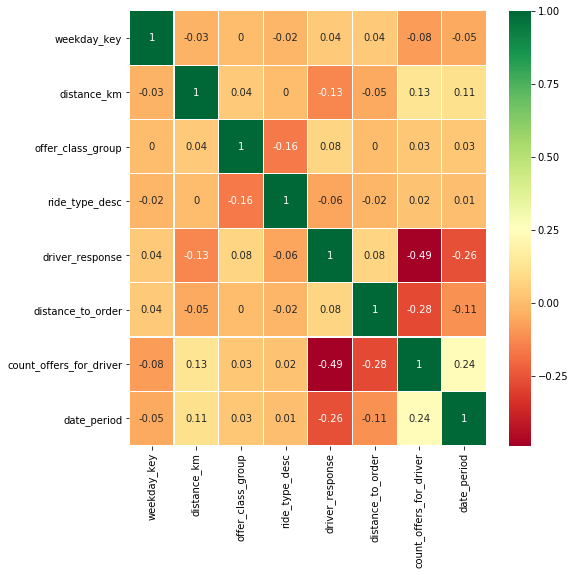

In [45]:
#Построение матрицы корреляции
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
f, ax = plt.subplots(figsize=(8, 8))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Как видно из матрицы корреляций, сильных зависимостей между параметрами нет. Поэтому в первом приближении используем их все при обучении модели.

Также перед обучением модели проверим на сбалансированность датасет.

In [69]:
data.driver_response.value_counts(normalize=True)

0    0.50752
1    0.49248
Name: driver_response, dtype: float64

Соотношение значений откликов примерно одинаковое, значит выборка сбалансированная и можно приступать к обучению.

### II. ОБУЧЕНИЕ МОДЕЛИ

#### Модель RANDOM FOREST

В переменной 'Х' сохраним все параметры, на основе которых мы будем предсказывать, а в переменной 'y' - предсказываемый параметр.

In [64]:
X = data.drop(['driver_response'], axis=1) #, 'ride_type_desc', 'offer_class_group'
y = data['driver_response']

Разделим выборку на две части: тренировочную и тестовую. Размер тестовой выборки - 20%.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

Поскольку в деревьях не используется взвешивание признаков, то не нужно выполнять 'центровку' и 'стандартизацию' данных путём их масштабирования.

Далее произведем обучение модели.


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# инициализация модели
model_rf = RandomForestClassifier(n_estimators=200, max_depth=25)  

# обучение модели
model_rf.fit(X_train, y_train)

# точность модели на тренировочных данных
model_rf_pred_train = model_rf.predict(X_train)
print(classification_report(y_train, model_rf_pred_train))
print('Точность модели Random Forest на тренировочных данных:', model_rf.score(X_train, y_train), '\n')

# точность модели на тестовых данных
model_rf_pred = model_rf.predict(X_test)
print(classification_report(y_test, model_rf_pred))
print('Точность модели Random Forest на тестовых данных:', model_rf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     40602
           1       0.98      0.99      0.98     39398

    accuracy                           0.98     80000
   macro avg       0.98      0.98      0.98     80000
weighted avg       0.98      0.98      0.98     80000

Точность модели Random Forest на тренировочных данных: 0.9841125 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74     10150
           1       0.72      0.80      0.76      9850

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000

Точность модели Random Forest на тестовых данных: 0.75035


No handles with labels found to put in legend.


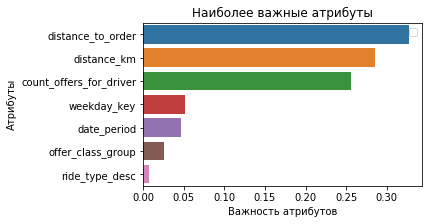

In [70]:
# Наиболее важные атрибуты для модели Random Forest
headers = list(X_train.columns.values)

feature_imp = pd.Series(model_rf.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [ ]:
pip install xgboost

In [ ]:
pip install --upgrade xgboost

In [ ]:
data['driver_response'].value_counts(normalize=True)

## XGBoost

In [ ]:
# сохранение переменных
X = data.drop(['driver_response', 'speed_average'], axis=1)
y = data['driver_response']

# разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
# инициализация модели
model = XGBClassifier(seed=42, 
                         n_estimators=100,
                         max_depth=6,
                         learning_rate=0.3)

# обучение модели
model.fit(X_train, y_train)

# точность модели на тренировочных данных
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

# точность модели на тестовых данных
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
#информативность переменных
import seaborn as sns
sns.set(font_scale = 1.5)

In [ ]:
import xgboost as xgb

In [ ]:
xgb.plot_importance(model)

In [ ]:
выше - информативность каждой переменной. сколько раз переменная использовалась для расщепления. чем больше раз, тем она важнее.

In [ ]:
#сохранение переменных
X = data.drop(['driver_response', 'speed_average'], axis=1)
y = data['driver_response']

#разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)


model = XGBClassifier(n_estimators=800,
                         max_depth=25,  #8
                         learning_rate=0.07,#0.08
                     subsample=0.5)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
xgb.plot_importance(model)

In [ ]:
#сохранение переменных
X = data.drop(['driver_response', 'weekday_key', 'date_period', 'ride_type_desc', 'offer_class_group', 'speed_average'], axis=1)
y = data['driver_response']

#разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y) #random_state=30)


model = XGBClassifier(n_estimators=800,
                         max_depth=25,  #8
                         learning_rate=0.07,#0.08
                     subsample=0.5)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
xgb.plot_importance(model)